In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nn.csv to nn.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['nn.csv']))

In [ ]:
df.drop(df.filter(regex="Unnamed").columns, axis=1, inplace=True)
df.head(10)

,Carbon,Methane,Label
0,517.75,4776.82,1
1,500.22,2651.58,1
2,414.50,2312.60,1
3,211.92,1056.19,1
4,202.14,986.20,1
5,165.92,869.41,1
6,135.27,826.90,1
7,118.56,644.11,1
8,86.56,585.71,1
9,81.96,572.46,1


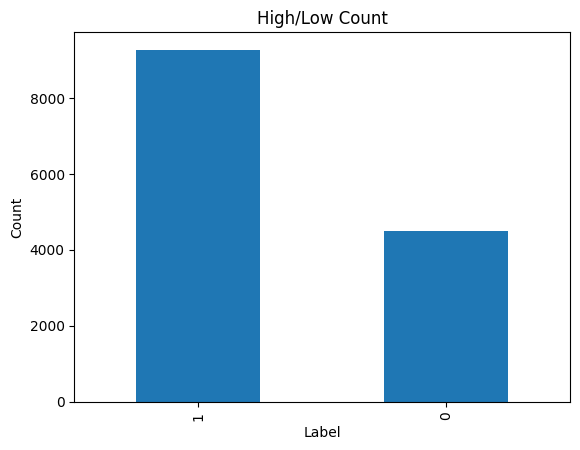

In [ ]:
# get the count of each fruit using value_counts()
label_counts = df['Label'].value_counts()

# plot the count using a bar graph
label_counts.plot(kind='bar')

# set the labels and title for the graph
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('High/Low Count')

# display the graph
plt.show()

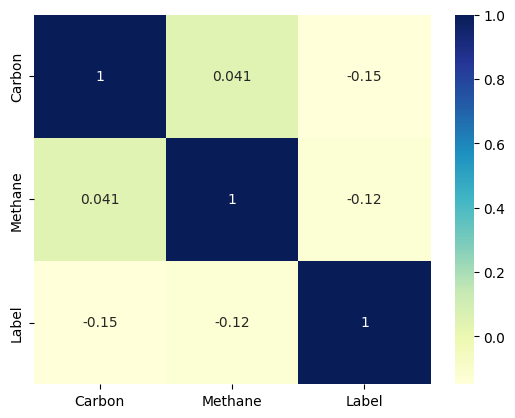

,Carbon,Methane,Label
Carbon,1.000000,0.040891,-0.148757
Methane,0.040891,1.000000,-0.122862
Label,-0.148757,-0.122862,1.000000


In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
df.corr()

In [ ]:
X = df.drop(['Label'], axis=1).values
y = df['Label'].values

In [ ]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the DataFrame using the scaler
normalized_df = pd.DataFrame(scaler.fit_transform(X), columns=['Carbon','Methane'])

# print the normalized DataFrame
normalized_df.head(10)

,Carbon,Methane
0,0.763722,0.526259
1,0.737864,0.322427
2,0.611420,0.289915
3,0.312599,0.169412
4,0.298172,0.162699
5,0.244745,0.151498
6,0.199534,0.147421
7,0.174885,0.129890
8,0.127683,0.124288
9,0.120897,0.123018


In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
345/345 [==============================] - 4s 11ms/step - loss: 0.1443 - accuracy: 0.9755 - val_loss: 0.1324 - val_accuracy: 0.9778
Epoch 2/50
345/345 [==============================] - 2s 6ms/step - loss: 0.1292 - accuracy: 0.9789 - val_loss: 0.1185 - val_accuracy: 0.9782
Epoch 3/50
345/345 [==============================] - 2s 6ms/step - loss: 0.1170 - accuracy: 0.9800 - val_loss: 0.1089 - val_accuracy: 0.9789
Epoch 4/50
345/345 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9806 - val_loss: 0.1001 - val_accuracy: 0.9822
Epoch 5/50
345/345 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9817 - val_loss: 0.0934 - val_accuracy: 0.9818
Epoch 6/50
345/345 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9821 - val_loss: 0.0866 - val_accuracy: 0.9818
Epoch 7/50
345/345 [==============================] - 2s 5ms/step - loss: 0.0860 - accuracy: 0.9820 - val_loss: 0.0833 - val_accuracy: 0.9807
Epoch

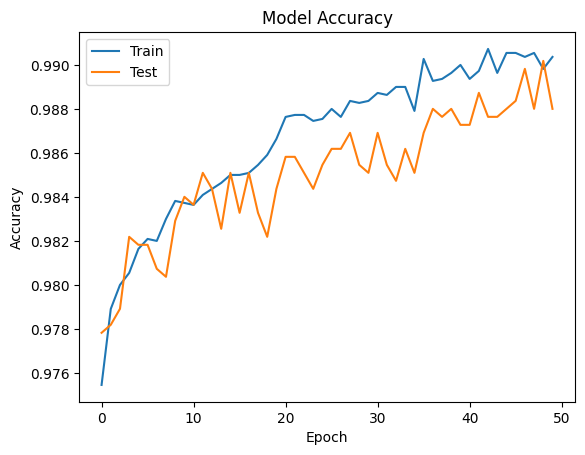

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.01) # Convert probabilities to binary predictions
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion_mtx)

87/87 [==============================] - 0s 2ms/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
[0 1 1 ... 1 1 1]
Test accuracy: 0.8430802760624773
Confusion matrix:
[[ 480  432]
 [   0 1841]]
